In [1]:
!pip install numpy pandas matplotlib requests tqdm opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_path = 'Fruit-Project'
os.chdir(dataset_path)
os.listdir()

['carambola',
 'black berry',
 'barberry',
 'watermelon',
 'apple',
 'persimmon',
 'lime',
 'jackfruit',
 'pomegranate',
 'bayberry',
 'cantaloupe',
 'banana',
 'eggplant',
 'lemon',
 'dragonfruit',
 'blueberry',
 'papaya',
 'orange',
 'pear',
 'pineapple',
 'tomato',
 'bottle gourd',
 'avocado',
 'bell pepper',
 'mango',
 'peanut',
 'cherry',
 'custard apple',
 'pumpkin',
 'coconut',
 'kiwi',
 'saguaro',
 'strawberry',
 'grape',
 'black cherry',
 'pea',
 'alligator apple',
 'fig',
 'macadamia',
 'zucchini',
 'longan',
 'durian',
 'jalapeno',
 'corn kernel']

In [4]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): 
    os.chdir(fruit)
    for file in os.listdir(): 
        try:
            img = cv2.imread(file)
            new_row = {'categories':fruit, 'filename':file, 'ImageWidth':img.shape[1], 'ImageHeight':img.shape[0]}
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        except:
            print(os.path.join(fruit, file), 'retrieval error')
    os.chdir('../')
os.chdir('../')

100%|██████████| 44/44 [01:27<00:00,  1.99s/it]


In [5]:
df

categories filename  ImageWidth  ImageHeight
0        carambola  845.jpg         390          260
1        carambola  524.jpg         390          260
2        carambola  774.jpg         393          260
3        carambola  240.jpg         169          180
4        carambola   64.jpg         137          150
...            ...      ...         ...          ...
43908  corn kernel  453.jpg         432          260
43909  corn kernel    5.jpg         278          186
43910  corn kernel  949.jpg         388          260
43911  corn kernel  858.jpg         390          260
43912  corn kernel  607.jpg         391          260

[43913 rows x 4 columns]

In [6]:
!pip install scipy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


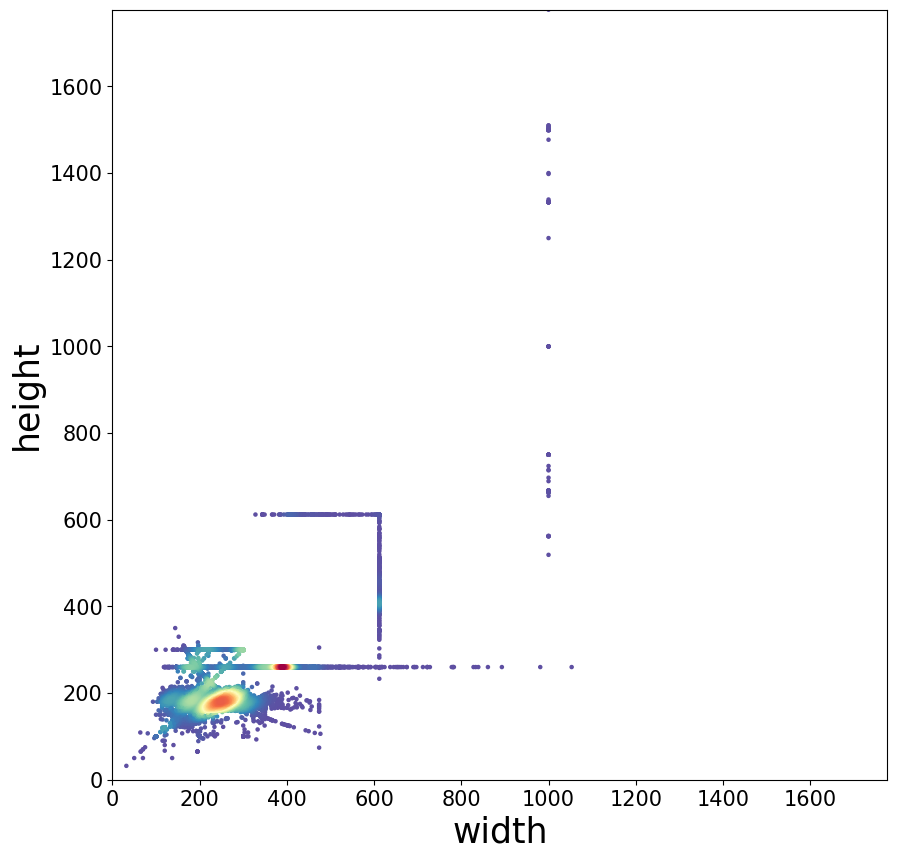

In [7]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['ImageWidth']
y = df['ImageHeight']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['ImageWidth']), max(df['ImageHeight']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('citrus image size distribution.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [8]:
import os
import shutil
import random
import pandas as pd

In [9]:
dataset_path = 'Fruit-Project'

In [10]:
dataset_name = dataset_path.split('_')[0]
print('dataset', dataset_name)

dataset Fruit-Project


In [11]:
classes = os.listdir(dataset_path)

In [12]:
len(classes)

44

In [13]:
classes

['carambola',
 'black berry',
 'barberry',
 'watermelon',
 'apple',
 'persimmon',
 'lime',
 'jackfruit',
 'pomegranate',
 'bayberry',
 'cantaloupe',
 'banana',
 'eggplant',
 'lemon',
 'dragonfruit',
 'blueberry',
 'papaya',
 'orange',
 'pear',
 'pineapple',
 'tomato',
 'bottle gourd',
 'avocado',
 'bell pepper',
 'mango',
 'peanut',
 'cherry',
 'custard apple',
 'pumpkin',
 'coconut',
 'kiwi',
 'saguaro',
 'strawberry',
 'grape',
 'black cherry',
 'pea',
 'alligator apple',
 'fig',
 'macadamia',
 'zucchini',
 'longan',
 'durian',
 'jalapeno',
 'corn kernel']

In [14]:
os.mkdir(os.path.join(dataset_path, 'train'))
os.mkdir(os.path.join(dataset_path, 'val'))
os.mkdir(os.path.join(dataset_path, 'test'))

for fruit in classes:
    os.mkdir(os.path.join(dataset_path, 'train', fruit))
    os.mkdir(os.path.join(dataset_path, 'val', fruit))
    os.mkdir(os.path.join(dataset_path, 'test', fruit))

In [15]:
val_frac = 0.2
test_frac = 0.1
random.seed(123)

In [16]:
import os
import random
import shutil
import pandas as pd
df = pd.DataFrame()

print('{:^18} {:^18} {:^18} {:^18}'.format('Category', 'Number of train set', 'Number of val set', 'Number of test set'))

for fruit in classes:

    old_dir = os.path.join(dataset_path, fruit)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename)

    testset_numer = int(len(images_filename) * test_frac)
    valset_numer = int(len(images_filename) * val_frac)
    
    testset_images = images_filename[:testset_numer]
    valset_images = images_filename[testset_numer:testset_numer+valset_numer]
    trainset_images = images_filename[testset_numer+valset_numer:]

    for image in testset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)
        new_test_path = os.path.join(dataset_path, 'test', fruit, image)
        shutil.move(old_img_path, new_test_path)

    for image in valset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)
        new_val_path = os.path.join(dataset_path, 'val', fruit, image)
        shutil.move(old_img_path, new_val_path)

    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)
        new_train_path = os.path.join(dataset_path, 'train', fruit, image)
        shutil.move(old_img_path, new_train_path)

    assert len(os.listdir(old_dir)) == 0
    shutil.rmtree(old_dir)

    print('{:^18} {:^18} {:^18} {:^18}'.format(fruit, len(trainset_images), len(valset_images), len(testset_images)))

    new_row = {'class': fruit, 'trainset': len(trainset_images), 'valset': len(valset_images), 'testset': len(testset_images)}
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

shutil.move(dataset_path, dataset_name+'_split')

df['total'] = df['trainset'] + df['valset'] + df['testset']
df.to_csv('number.csv01', index=False)

     Category      Number of train set Number of val set  Number of test set
    carambola             706                201                100        
   black berry            792                225                112        
     barberry             728                207                103        
    watermelon            698                199                 99        
      apple               843                240                120        
    persimmon             651                185                 92        
       lime               707                202                101        
    jackfruit             722                206                103        
   pomegranate            710                202                101        
     bayberry             700                199                 99        
    cantaloupe            707                201                100        
      banana              814                232                116        
     eggpla

In [17]:
df

class  trainset  valset  testset  total
0         carambola       706     201      100   1007
1       black berry       792     225      112   1129
2          barberry       728     207      103   1038
3        watermelon       698     199       99    996
4             apple       843     240      120   1203
5         persimmon       651     185       92    928
6              lime       707     202      101   1010
7         jackfruit       722     206      103   1031
8       pomegranate       710     202      101   1013
9          bayberry       700     199       99    998
10       cantaloupe       707     201      100   1008
11           banana       814     232      116   1162
12         eggplant       709     202      101   1012
13            lemon       708     202      101   1011
14      dragonfruit       725     207      103   1035
15        blueberry       702     200      100   1002
16           papaya       720     205      102   1027
17           orange       575     164       82    821
18             pear       706     201      100   1007
19        pineapple       727     207      103   1037
20           tomato       700     200      100   1000
21     bottle gourd       701     199       99    999
22          avocado       820     233      116   1169
23      bell pepper       700     200      100   1000
24            mango       718     205      102   1025
25           peanut       606     172       86    864
26           cherry       703     200      100   1003
27    custard apple       753     214      107   1074
28          pumpkin       333      95       47    475
29          coconut       718     204      102   1024
30             kiwi       707     202      101   1010
31          saguaro       316      90       45    451
32       strawberry       702     200      100   1002
33            grape       724     206      103   1033
34     black cherry       650     185       92    927
35              pea       984     281      140   1405
36  alligator apple       617     175       87    879
37              fig       709     202      101   1012
38        macadamia       703     200      100   1003
39         zucchini       708     201      100   1009
40           longan       714     203      101   1018
41           durian       719     205      102   1026
42         jalapeno       709     202      101   1012
43      corn kernel       714     203      101   1018

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm

In [19]:
folder_path = 'Fruit-Project_split/train/cantaloupe'

IndexError: index 4 is out of bounds for axis 0 with size 4

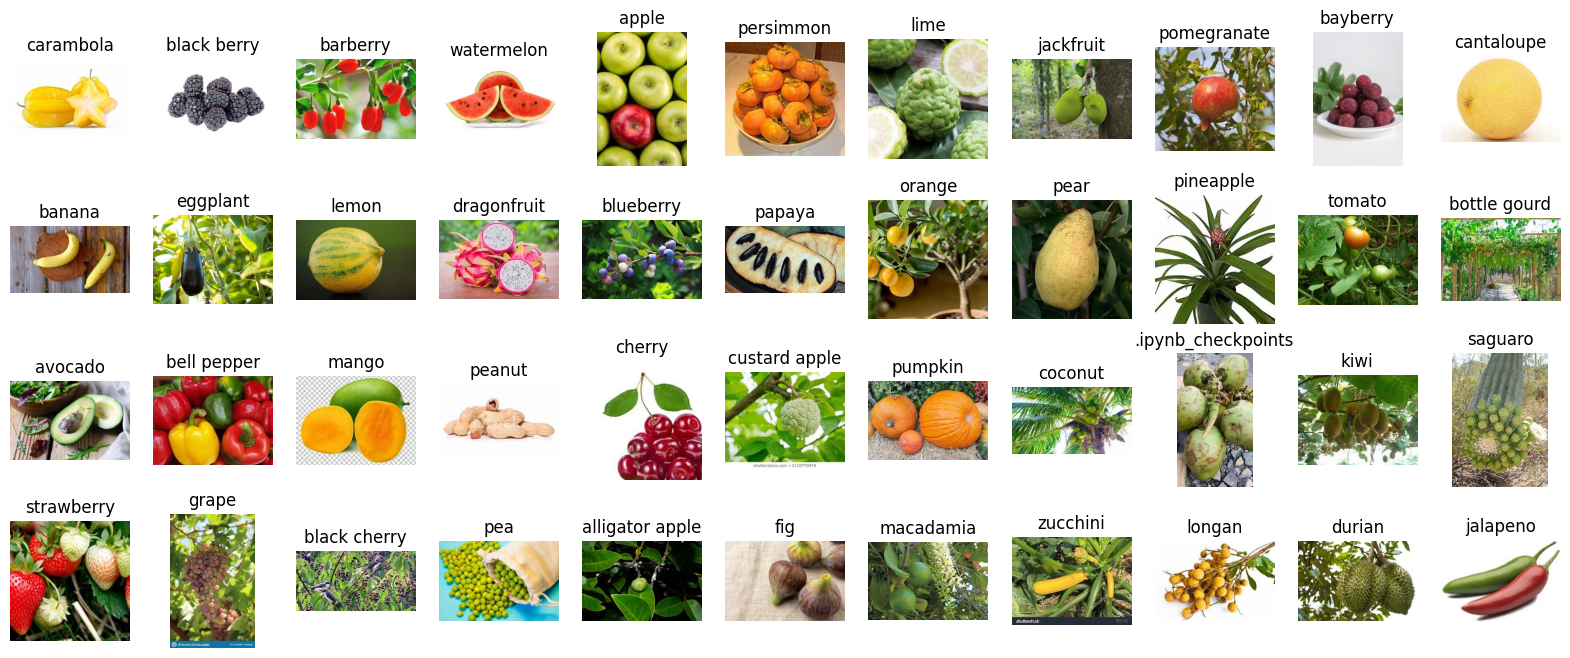

In [14]:
# import os
# import cv2

# # 定义数据集文件夹路径
# dataset_folder = "Fruit-Project_split/train"

# # 存储每一类别图像的字典
# class_images = {}

# # 遍历数据集文件夹中的所有图像文件
# for root, dirs, files in os.walk(dataset_folder):
#     for file in files:
#         # 图像文件路径
#         img_path = os.path.join(root, file)
        
#         # 图像读取
#         img_bgr = cv2.imread(img_path)
#         img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
#         # 获取图像所属的类别
#         category = os.path.basename(root)
        
#         # 如果该类别尚未存储图像列表，则创建一个空列表来存储图像
#         if category not in class_images:
#             class_images[category] = []
        
#         # 将当前图像添加到对应类别的图像列表中
#         class_images[category].append(img_rgb)

# # 输出每一类别的图像数量
# for category, images in class_images.items():
#     print(f"Category: {category}, Number of Images: {len(images)}")
#     plt.imshow(images[0])
#     plt.title(f"Category: {category}")
#     plt.axis('off')
#     plt.show()

import os
import cv2
import matplotlib.pyplot as plt

# 定义数据集文件夹路径
dataset_folder = "Fruit-Project_split/train"

# 存储每一类别图像的字典
class_images = {}

# 遍历数据集文件夹中的所有图像文件
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        # 图像文件路径
        img_path = os.path.join(root, file)
        
        # 图像读取
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        # 获取图像所属的类别
        category = os.path.basename(root)
        
        # 如果该类别尚未存储图像列表，则创建一个空列表来存储图像
        if category not in class_images:
            class_images[category] = []
        
        # 将当前图像添加到对应类别的图像列表中
        class_images[category].append(img_rgb)

# 输出每一类别的图像数量，并显示其中的一张图像
num_cols = 11
fig, axes = plt.subplots(4, num_cols, figsize=(20, 8))

for i, (category, images) in enumerate(class_images.items()):
    # 只取每个类别的第一张图像
    img = images[0]
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img)
    axes[row, col].set_title(category)
    axes[row, col].axis('off')

# 隐藏空白的子图
for i in range(len(class_images), 4 * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()





In [20]:
N = 36
n = math.floor(np.sqrt(N))
n

6

In [21]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

In [22]:
len(images)

36

/tmp/ipykernel_18939/3371800953.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


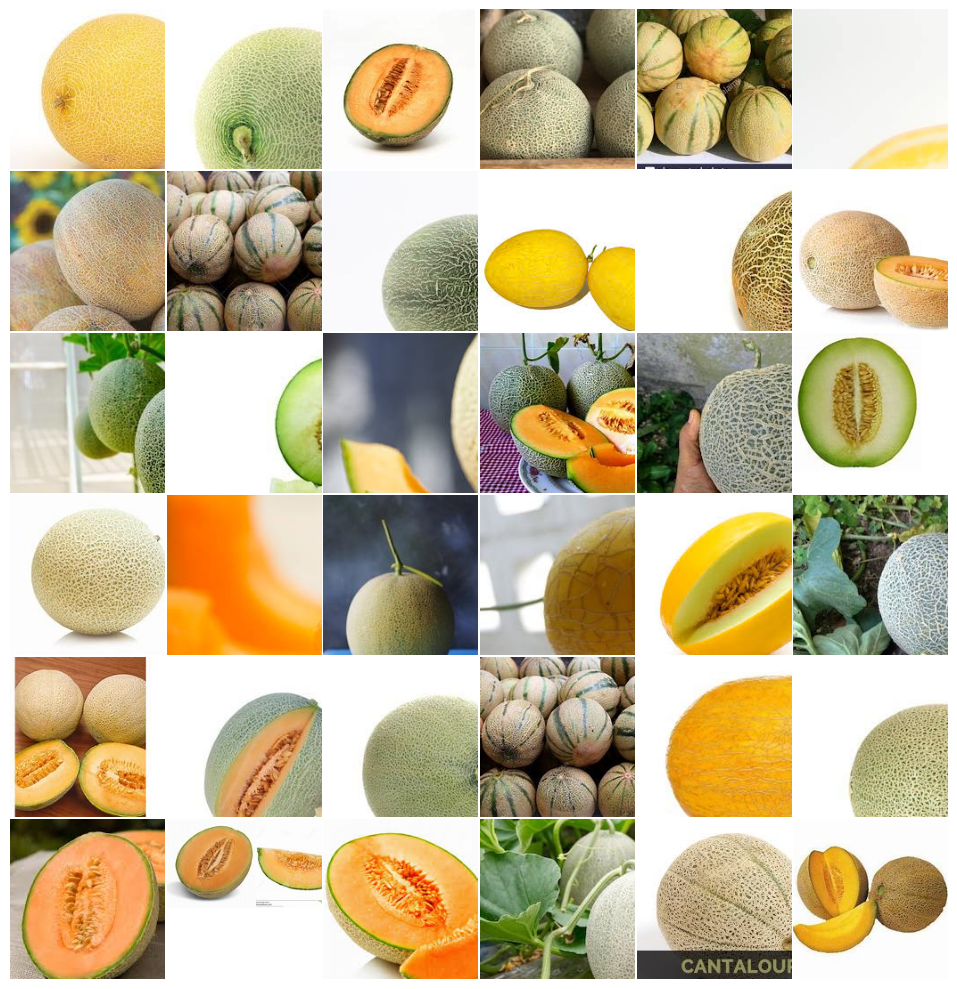

In [23]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(n, n),  
                 axes_pad=0.02,  
                 share_all=True
                 )


for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

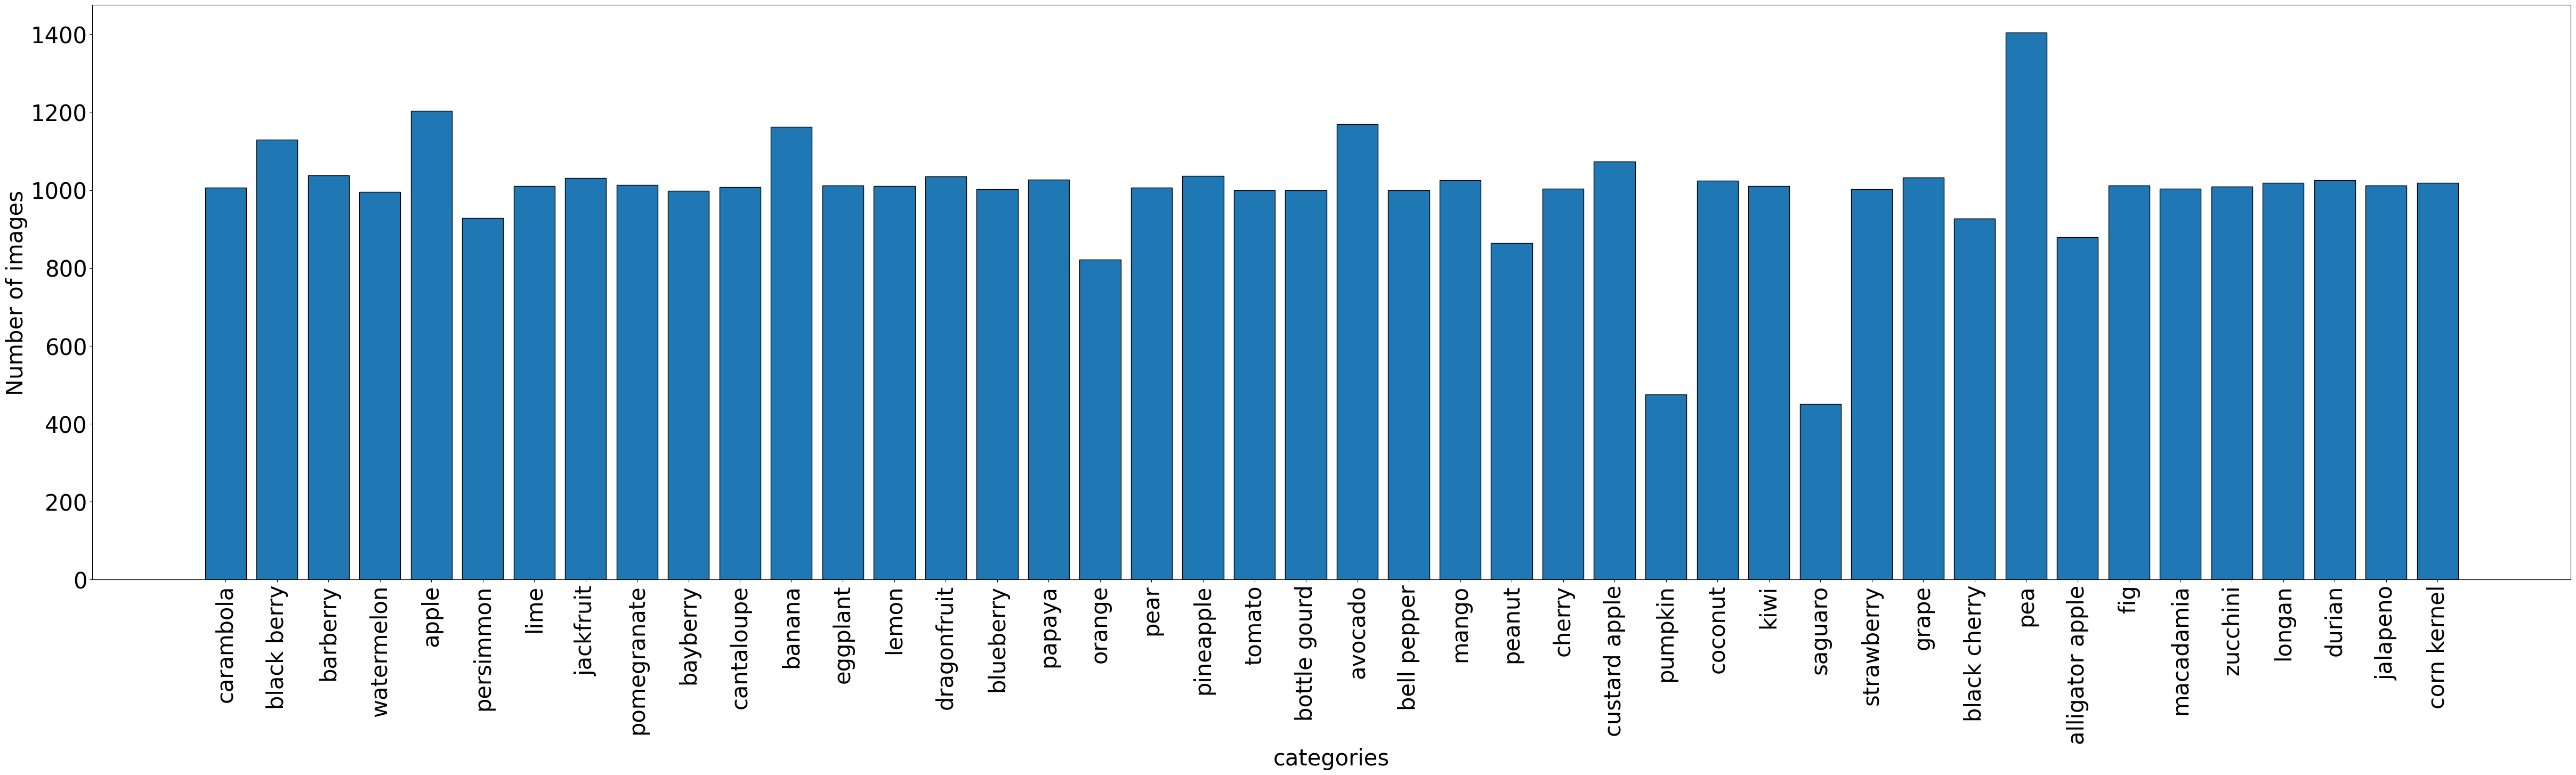

In [24]:
feature = 'total'
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 14))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=30)  
plt.xlabel('categories', fontsize=30)
plt.ylabel('Number of images', fontsize=30)


plt.savefig('Number of pictures by category.pdf', dpi=600, bbox_inches='tight')

plt.show()

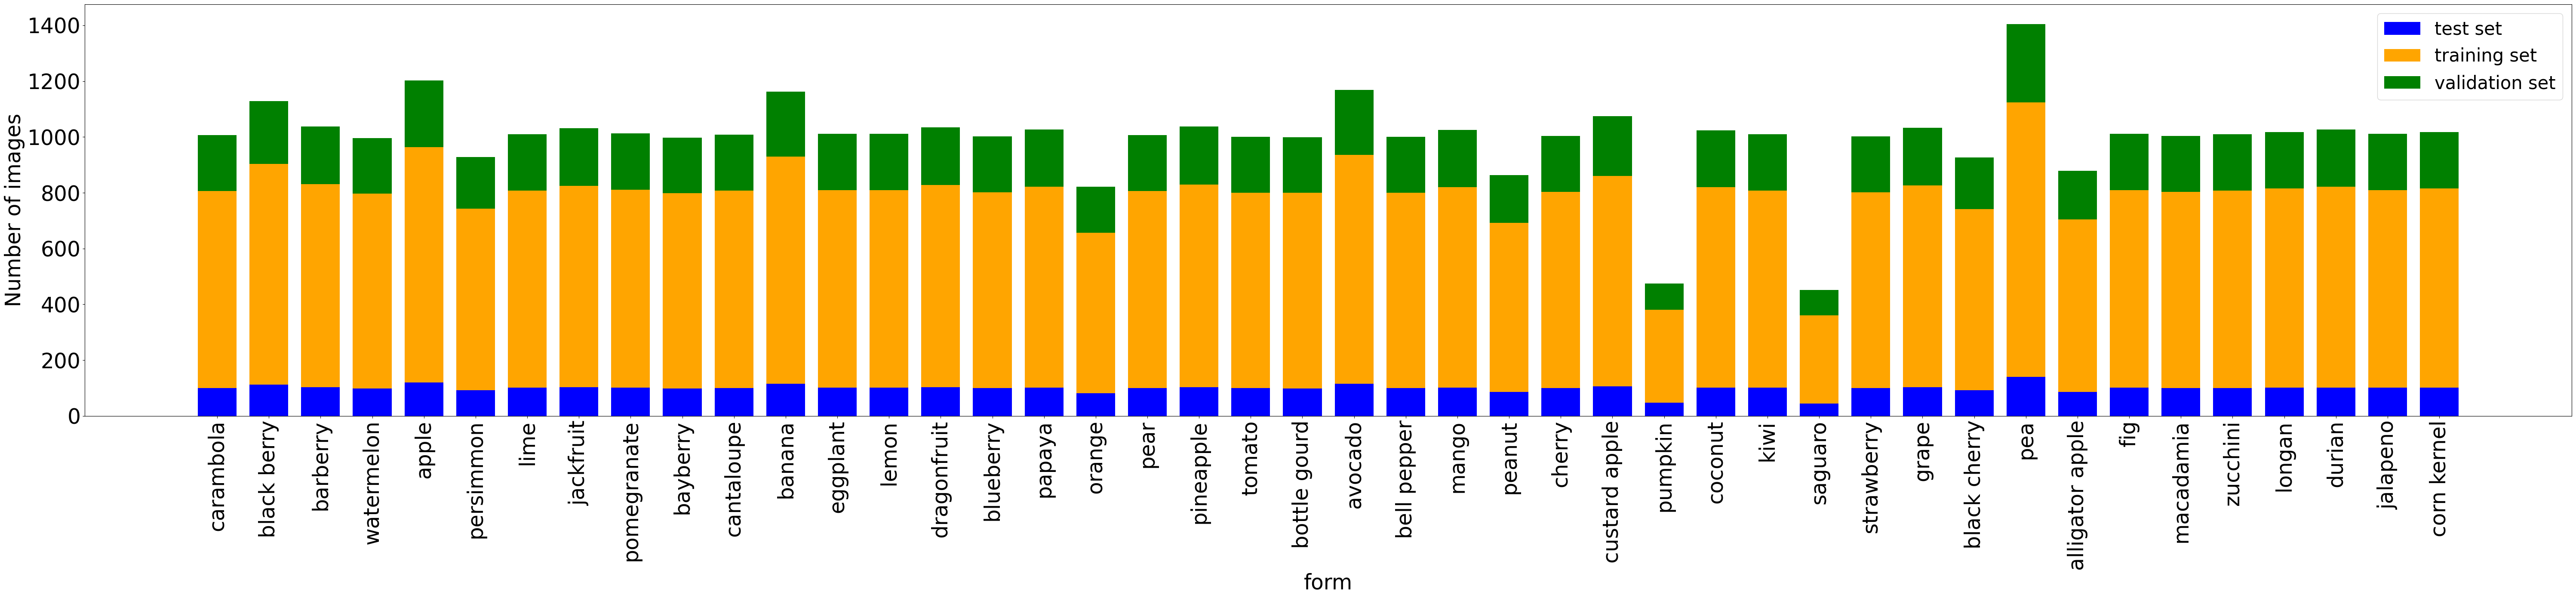

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 14))
x = df['class']
y1 = df['testset']
y2 = df['trainset']
y3 = df['valset']

width = 0.75
gap = 0.2

plt.xticks(rotation=90, ha='center')

plt.bar(x, y1, width, label='test set', color='blue', align='center')
plt.bar(x, y2, width, label='training set', bottom=y1, color='orange', align='center')
plt.bar(x, y3, width, label='validation set', bottom=y1+y2, color='green', align='center')

plt.xlabel('form', fontsize=35)
plt.ylabel('Number of images', fontsize=35)
plt.tick_params(labelsize=35)

plt.legend(fontsize=30)

plt.tight_layout()

plt.savefig('Number of images by category.pdf', dpi=1200, bbox_inches='tight')

plt.show()